In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
df = pd.read_csv('UnemploymentRateJan1986-Dec2018.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 2 columns):
Months                396 non-null object
Unemployment_Rates    396 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [11]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%b-%y')

df = pd.read_csv('UnemploymentRateJan1986-Dec2018.csv',
                    parse_dates = ['Months'],
                    index_col = 'Months',
                    date_parser = dateparse)

In [12]:
y_t = df['Unemployment_Rates']
y = np.log(df['Unemployment_Rates'])

C:\Users\Antony\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


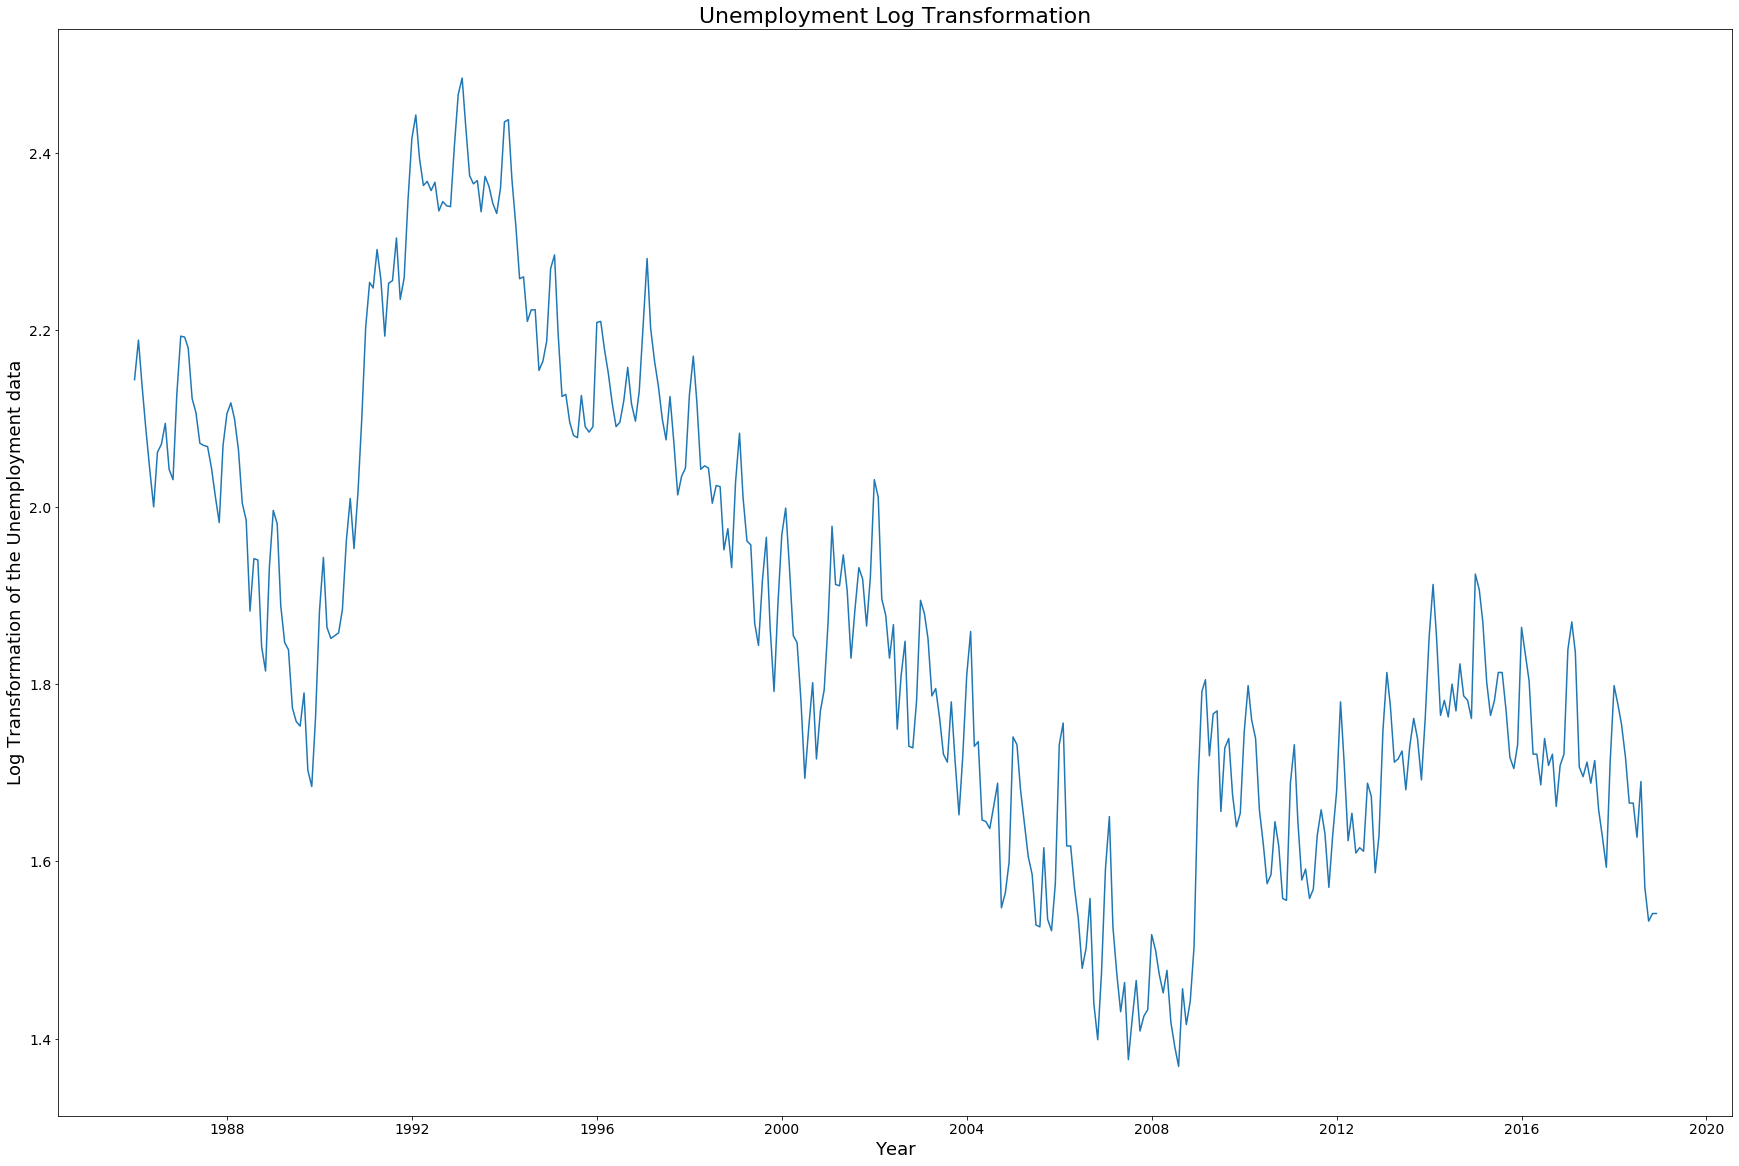

In [13]:
#y is the log transformation of the data
plt.figure(figsize = (30,20))
plt.plot(y)
plt.xlabel ('Year',fontsize = 18)
plt.ylabel ('Log Transformation of the Unemployment data',fontsize = 18)
plt.title ('Unemployment Log Transformation',fontsize = 22)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)

# Training and Testing

In [14]:
#%%Training and Testing Ranges
train_size = 12
split_point = len(y)-train_size
training, testing = y[0:split_point], y[split_point:]

In [15]:
print(len(training))
print(len(testing))

384
12


In [16]:
#Additive Method
fit_add = ExponentialSmoothing(training, seasonal_periods=12, trend='add', 
                            seasonal='add').fit()

#Multiplicative Method
fit_mul = ExponentialSmoothing(training, seasonal_periods=12, trend='add', 
                            seasonal='mul').fit()

#Additive Dam
fit_add_dam = ExponentialSmoothing(training, seasonal_periods=12, trend='add', 
                            seasonal='add',damped=True).fit()

#Multiplicative Dam
fit_mul_dam = ExponentialSmoothing(training, seasonal_periods=12, trend='add', 
                            seasonal='mul', damped=True).fit()

C:\Users\Antony\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Antony\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Antony\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Antony\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [17]:
#store the results
results = pd.DataFrame(index=[r"$\alpha$",\
                            r"$\beta$",\
                            r"$\phi$",\
                            r"$\gamma$",\
                            r"$l_0$",\
                            "$b_0$",\
                            "SSE"])
#Corresponds to the 6 parameters above except SSE
params = ['smoothing_level', \
          'smoothing_slope', \
          'damping_slope', \
          'smoothing_seasonal', \
          'initial_level', \
          'initial_slope']
#SSE
results["Additive"]       = [fit_add.params[p] for p in params] + [fit_add.sse]
results["Multiplicative"] = [fit_mul.params[p] for p in params] + [fit_mul.sse] 
results["Additive Dam"]       = [fit_add_dam.params[p] for p in params] + [fit_add.sse]
results["Multiplicative Dam"] = [fit_mul_dam.params[p] for p in params] + [fit_mul.sse] 

In [18]:
print(results)

          Additive  Multiplicative  Additive Dam  Multiplicative Dam
$\alpha$  0.632214    7.748070e-01      0.547325            0.626301
$\beta$   0.137466    3.666411e-15      0.205549            0.126278
$\phi$         NaN             NaN      0.875411            0.882972
$\gamma$  0.000000    0.000000e+00      0.000000            0.000000
$l_0$     1.945644    1.946063e+00      1.944676            1.941431
$b_0$     0.001905    0.000000e+00      0.002795            0.005229
SSE       0.461899    5.119249e-01      0.461899            0.511925


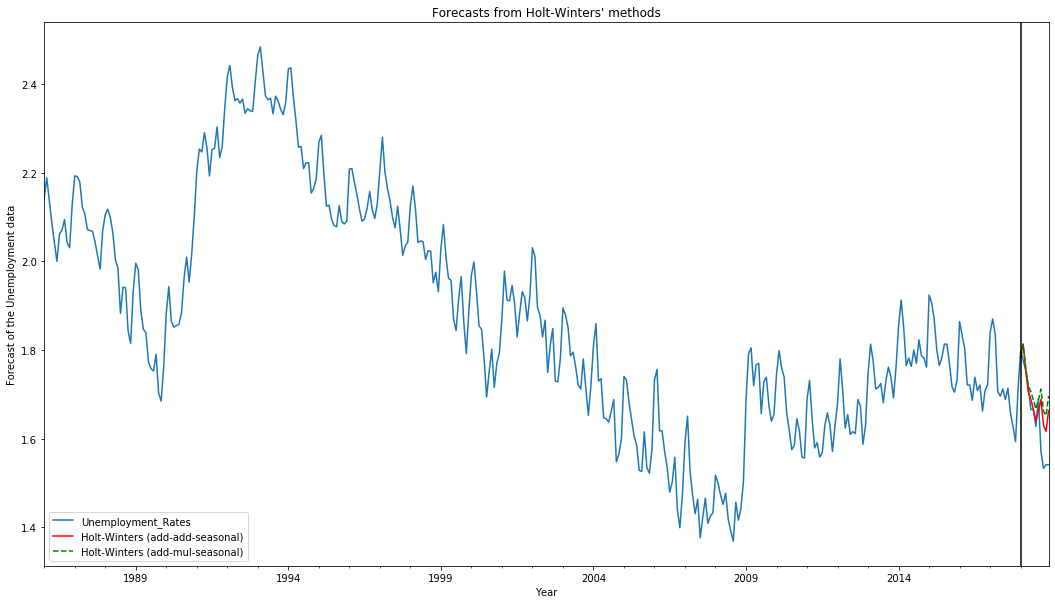

In [19]:
plt.figure()
ax = y.plot(figsize=(18,10), title="Forecasts from Holt-Winters' methods" )
ax.set_ylabel("Forecast of the Unemployment data")
ax.set_xlabel("Year")

# transfer the datatype to values
#smooth_add = fit_add.fittedvalues
#smooth_mul = fit_mul.fittedvalues
#smooth_add.plot(ax=ax, style='-', color='red',legend=True,label='Additive')
#smooth_mul.plot(ax=ax, style='--', color='green',label='Multiplicative')

#Forecast values for the next 12 months
forecast1 = fit_add.forecast(12).rename('Holt-Winters (add-add-seasonal)')
ax=forecast1.plot( style='-', color='red',legend=True)
forecast2=fit_mul.forecast(12).rename('Holt-Winters (add-mul-seasonal)')
forecast2.plot(ax=ax, style='--', color='green',legend=True)


plt.legend()
plt.axvline(x=y.index[split_point],color='black')

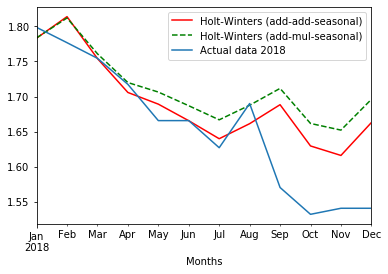

Forecasting Unemployment rate using Holt-Winters method with 
       both additive and multiplicative seasonality.
          Additive  Multiplicative  Additive Dam  Multiplicative Dam
$\alpha$  0.632214    7.748070e-01      0.547325            0.626301
$\beta$   0.137466    3.666411e-15      0.205549            0.126278
$\phi$         NaN             NaN      0.875411            0.882972
$\gamma$  0.000000    0.000000e+00      0.000000            0.000000
$l_0$     1.945644    1.946063e+00      1.944676            1.941431
$b_0$     0.001905    0.000000e+00      0.002795            0.005229
SSE       0.461899    5.119249e-01      0.461899            0.511925


In [20]:
plt.figure()
forecast1 = fit_add.forecast(12).rename('Holt-Winters (add-add-seasonal)')
ax=forecast1.plot( style='-', color='red',legend=True)
forecast2=fit_mul.forecast(12).rename('Holt-Winters (add-mul-seasonal)')
forecast2.plot(ax=ax, style='--', color='green',legend=True)
testing.plot(label='Actual data 2018',legend=True)
plt.show()

print("Forecasting Unemployment rate using Holt-Winters method with \n \
      both additive and multiplicative seasonality.")
print(results)

In [21]:
print('Forecast 2018 yearly data via additive method:\n')
display(forecast1)

print('Forecast 2018 yearly data via multiplicative method:\n')
display(forecast2)

Forecast 2018 yearly data via additive method:



2018-01-01    1.783085
2018-02-01    1.813679
2018-03-01    1.754084
2018-04-01    1.705851
2018-05-01    1.689241
2018-06-01    1.665652
2018-07-01    1.640071
2018-08-01    1.661456
2018-09-01    1.688455
2018-10-01    1.629792
2018-11-01    1.616291
2018-12-01    1.663034
Freq: MS, Name: Holt-Winters (add-add-seasonal), dtype: float64

Forecast 2018 yearly data via multiplicative method:



2018-01-01    1.783482
2018-02-01    1.811777
2018-03-01    1.760864
2018-04-01    1.719950
2018-05-01    1.706431
2018-06-01    1.686962
2018-07-01    1.666942
2018-08-01    1.687699
2018-09-01    1.711623
2018-10-01    1.661787
2018-11-01    1.652317
2018-12-01    1.696047
Freq: MS, Name: Holt-Winters (add-mul-seasonal), dtype: float64

# Mean Squared Error 

In [22]:
MSE1 = round(mean_squared_error(testing, forecast1),3)
print(MSE1)

0.004


In [23]:
MSE2 = round(mean_squared_error(testing, forecast2),3)
print(MSE2)

0.007


# Forecast 2019

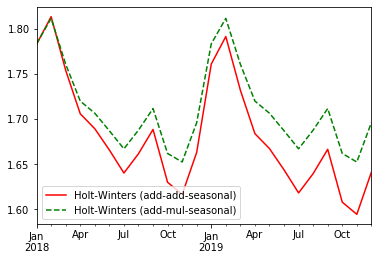

In [24]:
#Additive Method forecast 24 months
forecast1_24 = fit_add.forecast(24).rename('Holt-Winters (add-add-seasonal)')
ax=forecast1_24.plot( style='-', color='red',legend=True)


forecast2_24=fit_mul.forecast(24).rename('Holt-Winters (add-mul-seasonal)')
forecast2_24.plot(ax=ax, style='--', color='green',legend=True)

In [25]:
#Additive Holt-Winter Method
display(forecast1_24)

2018-01-01    1.783085
2018-02-01    1.813679
2018-03-01    1.754084
2018-04-01    1.705851
2018-05-01    1.689241
2018-06-01    1.665652
2018-07-01    1.640071
2018-08-01    1.661456
2018-09-01    1.688455
2018-10-01    1.629792
2018-11-01    1.616291
2018-12-01    1.663034
2019-01-01    1.761016
2019-02-01    1.791610
2019-03-01    1.732016
2019-04-01    1.683783
2019-05-01    1.667172
2019-06-01    1.643584
2019-07-01    1.618002
2019-08-01    1.639387
2019-09-01    1.666386
2019-10-01    1.607723
2019-11-01    1.594222
2019-12-01    1.640965
Freq: MS, Name: Holt-Winters (add-add-seasonal), dtype: float64

In [26]:
#Multiplcative Method Holt Winter Method
display(forecast2_24)

2018-01-01    1.783482
2018-02-01    1.811777
2018-03-01    1.760864
2018-04-01    1.719950
2018-05-01    1.706431
2018-06-01    1.686962
2018-07-01    1.666942
2018-08-01    1.687699
2018-09-01    1.711623
2018-10-01    1.661787
2018-11-01    1.652317
2018-12-01    1.696047
2019-01-01    1.783482
2019-02-01    1.811777
2019-03-01    1.760864
2019-04-01    1.719950
2019-05-01    1.706431
2019-06-01    1.686962
2019-07-01    1.666942
2019-08-01    1.687699
2019-09-01    1.711623
2019-10-01    1.661787
2019-11-01    1.652317
2019-12-01    1.696047
Freq: MS, Name: Holt-Winters (add-mul-seasonal), dtype: float64

# Version 2: Training, validation and testing

In [27]:
#%%Training and Testing Ranges
train_size = 12
validation_set = 24
split_point = len(y)-train_size
training, validation, testing = y[0:split_point-validation_set], y[split_point-validation_set:split_point],y[split_point:]

In [28]:
print(len(training))
print(len(validation))
print(len(testing))

360
24
12


In [29]:
#Additive Method
fit_add = ExponentialSmoothing(training, seasonal_periods=12, trend='add', 
                            seasonal='add').fit()

#Multiplicative Method
fit_mul = ExponentialSmoothing(training, seasonal_periods=12, trend='add', 
                            seasonal='mul').fit()

#Additive Dam
fit_add_dam = ExponentialSmoothing(training, seasonal_periods=12, trend='add', 
                            seasonal='add',damped=True).fit()

#Multiplicative Dam
fit_mul_dam = ExponentialSmoothing(training, seasonal_periods=12, trend='add', 
                            seasonal='mul', damped=True).fit()

C:\Users\Antony\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Antony\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Antony\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Antony\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [30]:
print(results)

          Additive  Multiplicative  Additive Dam  Multiplicative Dam
$\alpha$  0.632214    7.748070e-01      0.547325            0.626301
$\beta$   0.137466    3.666411e-15      0.205549            0.126278
$\phi$         NaN             NaN      0.875411            0.882972
$\gamma$  0.000000    0.000000e+00      0.000000            0.000000
$l_0$     1.945644    1.946063e+00      1.944676            1.941431
$b_0$     0.001905    0.000000e+00      0.002795            0.005229
SSE       0.461899    5.119249e-01      0.461899            0.511925


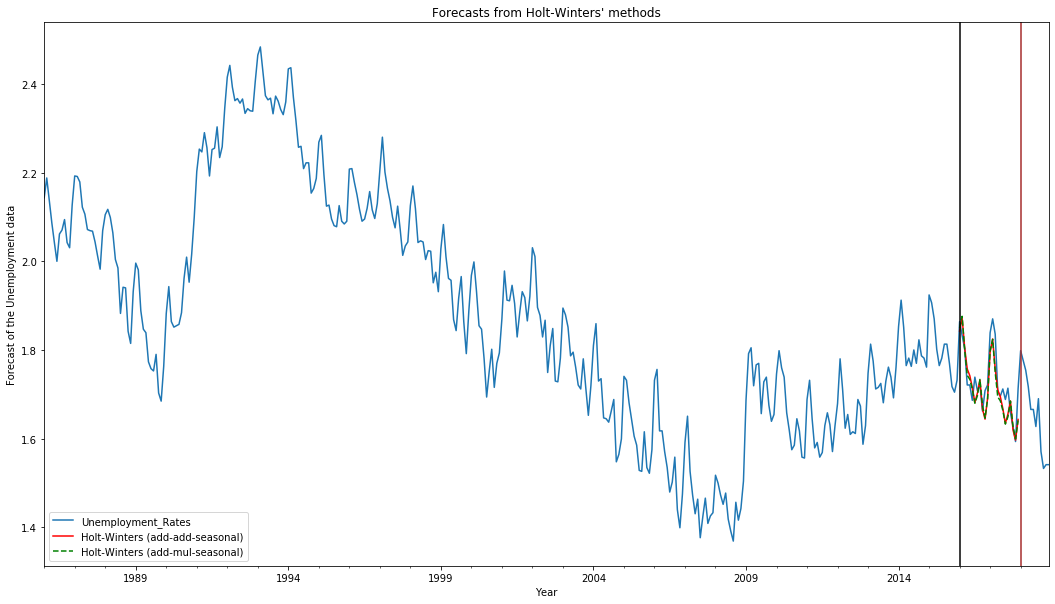

In [31]:
plt.figure()
ax = y.plot(figsize=(18,10), title="Forecasts from Holt-Winters' methods" )
ax.set_ylabel("Forecast of the Unemployment data")
ax.set_xlabel("Year")

# transfer the datatype to values
#smooth_add = fit_add.fittedvalues
#smooth_mul = fit_mul.fittedvalues
#smooth_add.plot(ax=ax, style='-', color='red',legend=True,label='Additive')
#smooth_mul.plot(ax=ax, style='--', color='green',label='Multiplicative')

#Forecast values for the next 24 months
forecast1 = fit_add.forecast(24).rename('Holt-Winters (add-add-seasonal)')
ax=forecast1.plot( style='-', color='red',legend=True)
forecast2=fit_mul.forecast(24).rename('Holt-Winters (add-mul-seasonal)')
forecast2.plot(ax=ax, style='--', color='green',legend=True)


plt.legend()
plt.axvline(x=y.index[split_point-validation_set],color='black')
plt.axvline(x=y.index[split_point],color='brown')

Compare the validation set

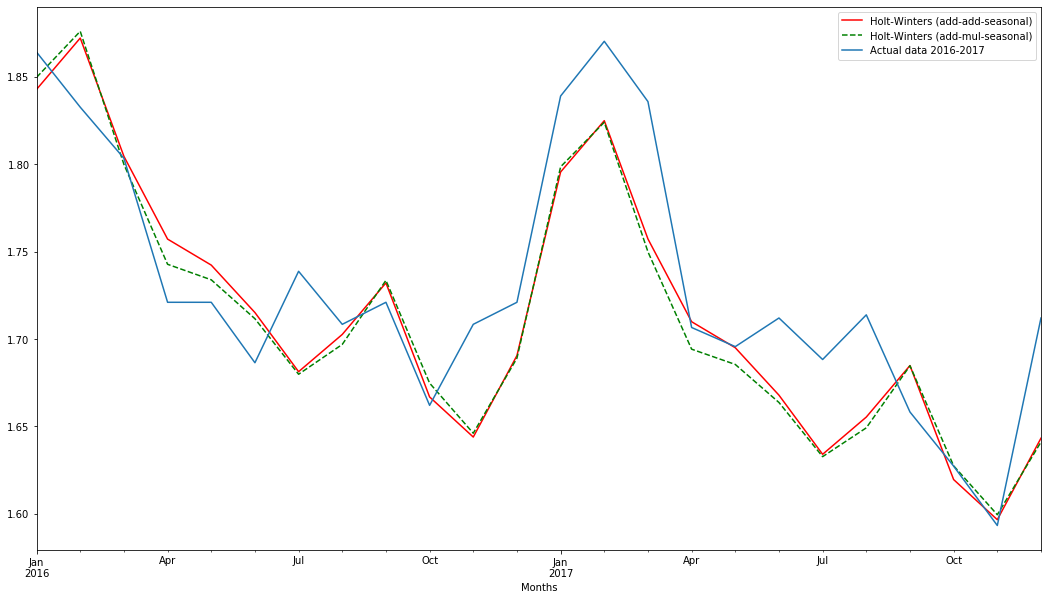

Forecasting Unemployment rate using Holt-Winters method with 
       both additive and multiplicative seasonality.


In [32]:
plt.figure(figsize=(18,10))
forecast1_validation = fit_add.forecast(24).rename('Holt-Winters (add-add-seasonal)')
ax=forecast1_validation.plot( style='-', color='red',legend=True)
forecast2_validation=fit_mul.forecast(24).rename('Holt-Winters (add-mul-seasonal)')
forecast2_validation.plot(ax=ax, style='--', color='green',legend=True)
validation.plot(label='Actual data 2016-2017',legend=True)
plt.show()

print("Forecasting Unemployment rate using Holt-Winters method with \n \
      both additive and multiplicative seasonality.")

In [33]:
MSE1 = round(mean_squared_error(validation, forecast1_validation),3)
print(MSE1)

0.002


In [34]:
MSE2 = round(mean_squared_error(validation, forecast2_validation),3)
print(MSE1)

0.002


Both methods give similar results for prediction

In [35]:
forecast1_test = fit_add.forecast(48).rename('Holt-Winters (add-add-seasonal)')
forecast2_test = fit_mul.forecast(48).rename('Holt-Winters (add-mul-seasonal)')

In [36]:
forecast1_test2019 = forecast1_test[-12:]
forecast2_test2019 = forecast2_test[-12:]

In [37]:
#addictive method

In [38]:
display(forecast1_test2019)

2019-01-01    1.700990
2019-02-01    1.730351
2019-03-01    1.662687
2019-04-01    1.615347
2019-05-01    1.600466
2019-06-01    1.573335
2019-07-01    1.539504
2019-08-01    1.560810
2019-09-01    1.590281
2019-10-01    1.525057
2019-11-01    1.502113
2019-12-01    1.548721
Freq: MS, Name: Holt-Winters (add-add-seasonal), dtype: float64

In [39]:
#multiplicative method

In [40]:
display(forecast2_test2019)

2019-01-01    1.696133
2019-02-01    1.719907
2019-03-01    1.649769
2019-04-01    1.597058
2019-05-01    1.588583
2019-06-01    1.567856
2019-07-01    1.538431
2019-08-01    1.553727
2019-09-01    1.586944
2019-10-01    1.532795
2019-11-01    1.506233
2019-12-01    1.545170
Freq: MS, Name: Holt-Winters (add-mul-seasonal), dtype: float64